## Day 21 Lecture 2 Assignment

In this assignment, we will apply techniques for identifying and dealing with outliers to a dataset containing information about Uber rides.

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
uber_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

In [39]:
uber_data.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,0:21:33,0:29:00,0:07:27,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,0:19:27,0:26:00,0:06:33,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,1:06:53,1:23:00,0:16:07,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,0:13:37,0:20:00,0:06:23,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,0:38:54,0:49:00,0:10:06,665,13.43,21.92,3,1,0.90,1.61,0.31


Before we identify outliers in the given columns, we need to address three time columns (trip_time, total_time, and wait_time), which are provided as formatted strings (HH:MM:SS) instead of numeric values. Convert the values in these three columns into their numeric equivalents in minutes - "2:15" should be converted to "2.25", "1:22:30" should be converted to "82.5", and so on. You may find it helpful to write a function that does this and use the .apply() function to apply it to all of the necessary columns.

In [40]:
# answer goes here
uber_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

def hms_to_minutes(hms):
  mins = 0
  time = hms.split(':')
  mins = (float(time[0]) * 60.0) + float(time[1]) + (float(time[2]) / 60.0)
  return mins

uber_data['trip_time'] = uber_data['trip_time'].apply(hms_to_minutes)
uber_data['total_time'] = uber_data['total_time'].apply(hms_to_minutes)
uber_data['wait_time'] = uber_data['wait_time'].apply(hms_to_minutes)




Plot histograms for each of the column, excluding the trip ID. Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


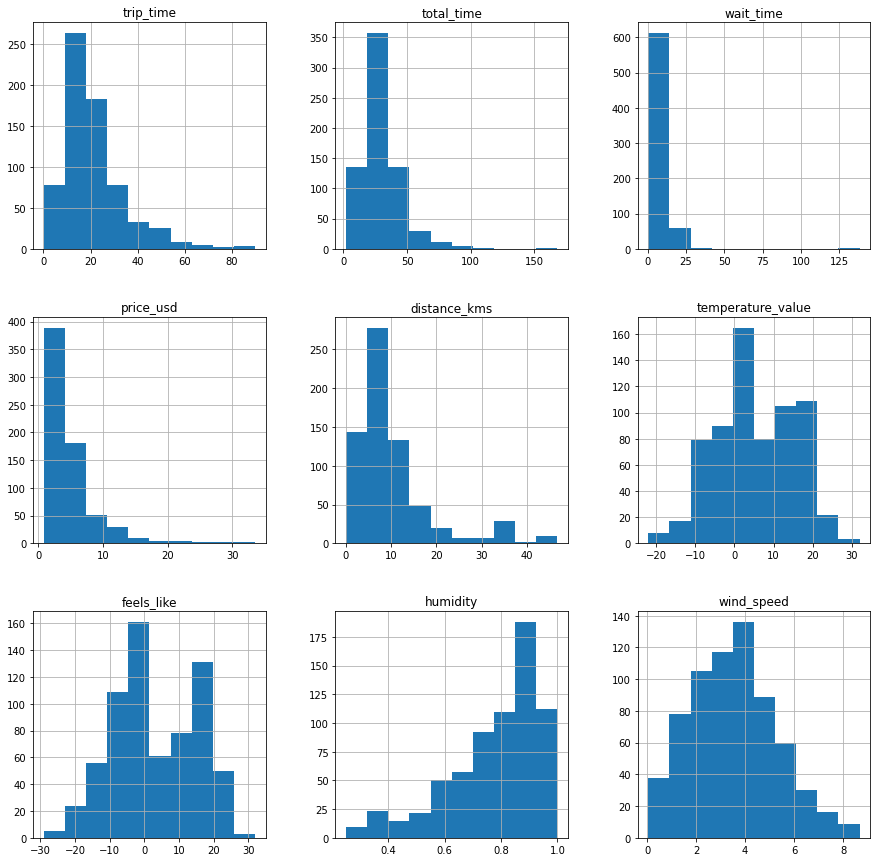

In [41]:
# answer goes here
data = uber_data.iloc[:, 1::]
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.hist(ax=ax)
plt.show()



It appears that trip time, total time, wait time, price and distance have outliers. These are most likely correct, as there are uber trips that have issues that lead to long wait times, long drive times, etc...

Using Tukey's IQR method and a threshold value of 1.5, how many trips have trip_time values that are identified as outliers? Print these trips out.

In [42]:
# answer goes here
threshold = 1.5
q75, q25 = np.percentile(uber_data['trip_time'], [75, 25])
iqr = q75 - q25
minValue = q25 - threshold*iqr
maxValue = q75 + threshold*iqr
outliers = uber_data.loc[(uber_data['trip_time'] < minValue) | (uber_data['trip_time'] > maxValue)]
print(outliers)
outliers.describe()






                             trip_uid  trip_time  ...  wind_speed  cloudness
2    6e460cc8a12c3c6568d0d4a67ac58393  66.883333  ...        5.25       0.86
13   36695e9088a840d3f7476e86294aa846  50.216667  ...        5.11       0.75
29   72801dd197d168a38ebaa88875492d60  68.066667  ...        5.75       0.62
45   f981dcaa5c7120490cdd38357b78c79c  48.216667  ...        5.95       0.46
47   e4004a6b46e6e1556f76f63f295a3f37  62.016667  ...        4.70       0.79
79   51785bfdf539132f5304a7ae1e1a6d9e  53.216667  ...        4.67       0.75
106  176e430aa7aafb4472cb09677d05fc2b  51.050000  ...        4.82       0.31
108  22f1e9c384f584cf65c51555e5428703  85.316667  ...        0.95       0.18
117  ab98f8918dff094689ae1657dadb6bbd  71.200000  ...        4.86       0.84
201  5383e6be5bc4f5edc74d2a22a422e30f  47.966667  ...        2.64        0.8
253  3b47b0f524410e22443ca2a5cb2c7f98  84.800000  ...        1.78       0.88
277  7177f2d41364690380434e9e6e89878a  61.283333  ...        6.08       0.99

,trip_time,total_time,wait_time,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed
count,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,61.327778,72.366667,11.038889,13.31100,24.663667,5.433333,3.066667,0.764333,3.947000
std,11.863814,13.659614,5.325055,7.14369,11.435657,10.692193,12.945332,0.150119,1.583656
min,47.566667,56.000000,3.466667,4.20000,9.410000,-11.000000,-15.000000,0.410000,0.950000
25%,51.495833,61.250000,7.733333,8.99250,15.880000,-2.750000,-6.500000,0.652500,2.670000
50%,59.683333,69.500000,9.850000,10.73000,20.815000,1.000000,-2.500000,0.810000,3.990000
75%,67.695833,82.500000,13.675000,15.25000,33.635000,14.750000,14.750000,0.877500,5.047500
max,89.783333,104.000000,29.883333,33.55000,46.040000,29.000000,31.000000,0.980000,7.380000


There are 30 trips that fall outside the outlier window with a threshold of 1.5 IQR

There are various ways of handling outliers, including "clipping" (also called "winsorizing"). Clip the outliers to the appropriate upper/lower threshold calculated as part of Tukey's method. Plot the histogram for trip_time after clipping; how does it look different?

47.487500000000004


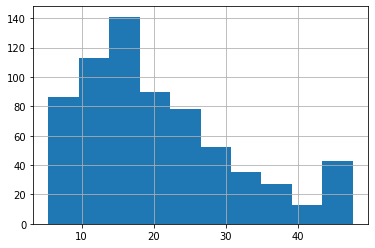

In [36]:
# answer goes here
from scipy.stats.mstats import winsorize
import scipy.stats as st

maxValue = q75 + threshold*iqr
percentile = st.percentileofscore(uber_data['trip_time'], maxValue)
percentile = (100-percentile)/100

winn_con = pd.Series(winsorize(uber_data['trip_time'], percentile))

winn_con.hist()
plt.show()




The new histogram after winsorizing the data has a large spike near the maxValue percentile, as all values greater than the cutoff are lumped together at that value. 